In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from ricci.simplicial_complex import SimplicialComplex
from ricci.ricci_flow import ricci_flow_community_detection
import matplotlib.pyplot as plt
import itertools

Dimensions and counts of simplices in the complex:
Dimension 0: 34 simplices
Dimension 1: 78 simplices
Dimension 2: 21 simplices
Iteration 1/10
Iteration 2/10
Iteration 3/10
Iteration 4/10
Iteration 5/10
Iteration 6/10
Iteration 7/10
Iteration 8/10
Iteration 9/10
Iteration 10/10
Weight range after Ricci flow: min=0.9279548044245016, max=0.9875704382286891

Applying weight cutoff theta = 0.8779548044245016
Detected 34 communities at theta=0.8779548044245016
NMI Score: 0.3285440999241004
ARI Score: 0.0
Modularity: 0

Applying weight cutoff theta = 0.8789548044245016
Detected 34 communities at theta=0.8789548044245016
NMI Score: 0.3285440999241004
ARI Score: 0.0
Modularity: 0

Applying weight cutoff theta = 0.8799548044245016
Detected 34 communities at theta=0.8799548044245016
NMI Score: 0.3285440999241004
ARI Score: 0.0
Modularity: 0

Applying weight cutoff theta = 0.8809548044245016
Detected 34 communities at theta=0.8809548044245016
NMI Score: 0.3285440999241004
ARI Score: 0.0
Modulari

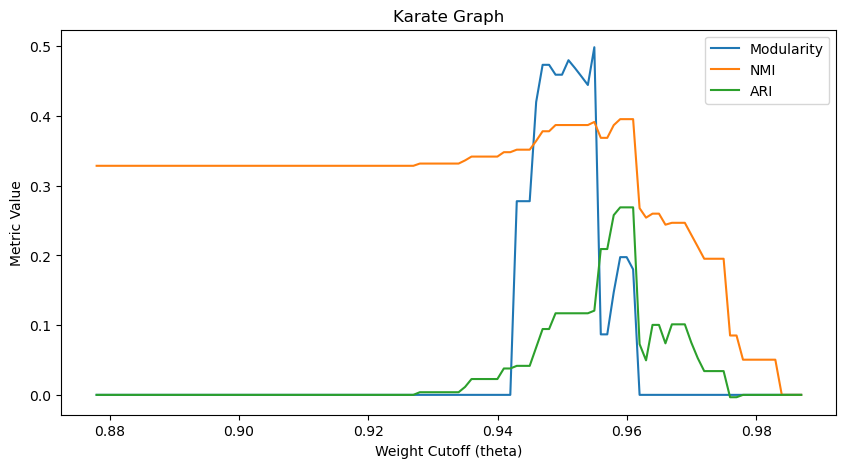

In [2]:
import networkx as nx
from ricci.simplicial_complex import SimplicialComplex
from ricci.ricci_flow import ricci_flow_community_detection

karate_graph = nx.karate_club_graph()

ground_truth_labels = {}
for node in sorted(karate_graph.nodes()):
    club = karate_graph.nodes[node]['club']
    label = 0 if club == 'Mr. Hi' else 1
    ground_truth_labels[node] = label

sc = SimplicialComplex()

for node in karate_graph.nodes():
    sc.add_simplex((node,))

for edge in karate_graph.edges():
    sc.add_simplex(edge)

max_clique_size = 3  
cliques = list(nx.find_cliques(karate_graph))

for clique in cliques:
    if len(clique) > 2 and len(clique) <= max_clique_size:
        for k in range(2, len(clique)):
            for simplex in itertools.combinations(clique, k+1):
                sc.add_simplex(simplex)

print("Dimensions and counts of simplices in the complex:")
for dim in sc.simplices:
    count = len(sc.simplices[dim])
    print(f"Dimension {dim}: {count} simplices")


nmi_scores, modularity_scores, theta_values, ari_scores = ricci_flow_community_detection(
                sc, T=10, delta=0.01, ground_truth=ground_truth_labels, min_theta_range=0.05)

plt.figure(figsize=(10,5))
plt.plot(theta_values, modularity_scores, label='Modularity')
plt.plot(theta_values, nmi_scores, label='NMI')
plt.plot(theta_values, ari_scores, label='ARI') 
plt.xlabel('Weight Cutoff (theta)')
plt.ylabel('Metric Value')
plt.title('Karate Graph')
plt.legend()
plt.grid(False)
plt.show()